### This notebook shows how to get a qualititave color cycle and line specification cycle

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import plot_utils as pu

In [3]:
%matplotlib inline

### 1. Get qualititave color cycles using `plot_utils.get_colors()` function

By default, `get_colors()` returns a list of 10 qualititave colors (hex values) belonging to the 'tab10' color cycle:

In [4]:
pu.get_colors()

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

These colors look like this:

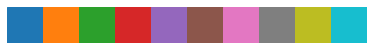

In [5]:
pu.Multiple_Colors(pu.get_colors()).show()  # Multiple_Colors is a helper class of pu

You can specify other color schemes. Here are some examples:

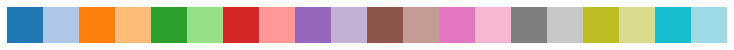

In [6]:
pu.Multiple_Colors(pu.get_colors(color_scheme='tab20')).show()

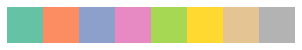

In [7]:
pu.Multiple_Colors(pu.get_colors(color_scheme='set2')).show()

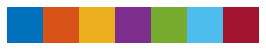

In [8]:
pu.Multiple_Colors(pu.get_colors(color_scheme='8.4')).show()  # default color palette used in MATLAB 8.4 (R2014b) or later

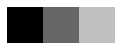

In [9]:
pu.Multiple_Colors(pu.get_colors(color_scheme='bw')).show()  # black and white

You can truncate the number of colors we need (by setting the first argument):

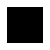

In [10]:
pu.Multiple_Colors(pu.get_colors(color_scheme='bw',N=1)).show()

The 'b/w' color palette has 6 distinct colors, if you ask for more than 5, you get a list of "wrapped around" colors:

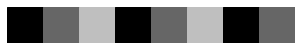

In [11]:
pu.Multiple_Colors(pu.get_colors(color_scheme='bw',N=8)).show()

The list of accepted color scheme names is:

'Pastel1',
'Pastel2',
'Paired',
'Accent',
'Dark2',
'Set1',
'Set2',
'Set3',
'tab10',
'tab20',
'tab20b',
'tab20c',
'8.3',
'8.4',
'bw' (or 'bw3'),
'bw4',
'bw5',
and 'rgbcmyk'

All the color schemes are demonstrated below:

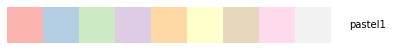

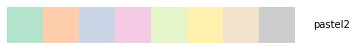

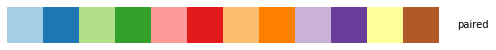

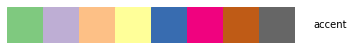

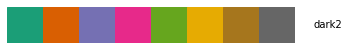

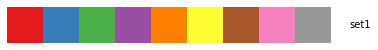

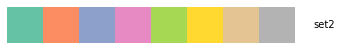

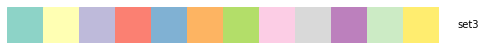

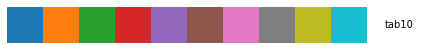

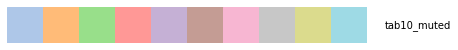

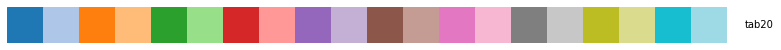

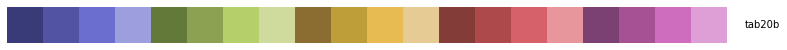

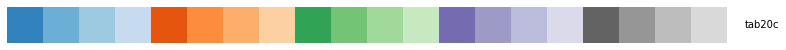

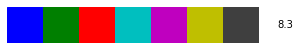

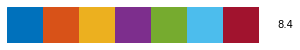

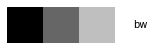

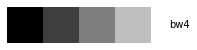

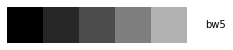

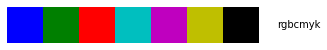

In [12]:
schemes = [
    'pastel1', 'pastel2', 'paired', 'accent', 'dark2', 'set1', 'set2', 'set3',
    'tab10', 'tab10_muted', 'tab20', 'tab20b', 'tab20c', '8.3', '8.4', 'bw', 'bw4', 'bw5', 'rgbcmyk',
]
for scheme in schemes:
    pu.Multiple_Colors(pu.get_colors(color_scheme=scheme)).show(text=scheme)

### 2. A demonstration of `plot_utils.Color()` and `plot_utils.Multiple_Colors()` classes

`pu.Color()` is a class that contains the information of a color. It can be initialized with an RGB value, HEX value, or color names in English.

In [13]:
red = pu.Color('red')

In [14]:
red.as_rgb()  # query the RGB value of this color

(1.0, 0.0, 0.0)

In [15]:
red.as_rgb(normalize=False)  # query the un-normalized RGB value of this color

(255, 0, 0)

In [16]:
red.as_hex()  # query the HEX value of this color

'#FF0000'

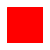

In [17]:
red.show()  # show this color

You can initialize it in other ways:

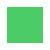

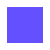

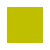

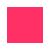

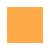

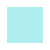

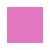

In [18]:
pu.Color([0.3, 0.8, 0.4]).show()  # normalized RGB
pu.Color([100, 80, 255]).show()  # un-normalized RGB
pu.Color('y').show()  # base colors: b, c, g, k, m, r, w, y
pu.Color('#FF3065').show()  # HEX string
pu.Color('xkcd:light orange').show()  # XKCD color names (https://xkcd.com/color/rgb/)
pu.Color('PaleTurquoise').show()  # X11 color names (http://cng.seas.rochester.edu/CNG/docs/x11color.html)
pu.Color('tab:pink').show()  # tab10 color names (blue, orange, green, red, purple, brown, pink, gray, olive, cyan)

`pu.Multiple_Colors()` is a class that contains the information of multiple colors. You can initialize it as a list of the valid color information:

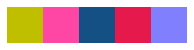

In [19]:
pu.Multiple_Colors(['y', 'xkcd:barbie pink', 'xkcd:light navy', [0.9, 0.1, 0.3], [128, 128, 255]]).show()

You can demonstrate the color vertically, and with a title:

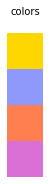

In [20]:
pu.Multiple_Colors(['gold', 'xkcd:periwinkle blue', 'Coral', 'Orchid']).show(vertical=True, text='colors')

### 3. Get line specification cycles via <font color='blue'>plot_utils.get_linespecs()</font> function

By default, `get_linespecs` returns 120 distinct line specifications (line color, line style, and line width) for plotting, as a list of dictionaries. Below is the first 15 dictionaries.

There are 10 colors, 4 line styles (-, --, -., ..), and 3 line widths (1, 2, and 3) to cycle through in the default case (hence 120 combinations).

After 10 colors in the default color palette ('tab10') is used up, a new line style ('ls') is used. And line width ('lw') will increase after all color-style combination is used up.

In [21]:
pu.get_linespecs()[12:15]

[{'lw': 1, 'ls': '--', 'color': '#2ca02c'},
 {'lw': 1, 'ls': '--', 'color': '#d62728'},
 {'lw': 1, 'ls': '--', 'color': '#9467bd'}]

To use it in plotting:

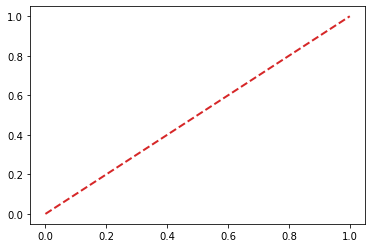

In [22]:
plt.plot([0,1],[0,1],**pu.get_linespecs()[53]);

Below is a demonstration of the 120 line specifications when used in plotting:

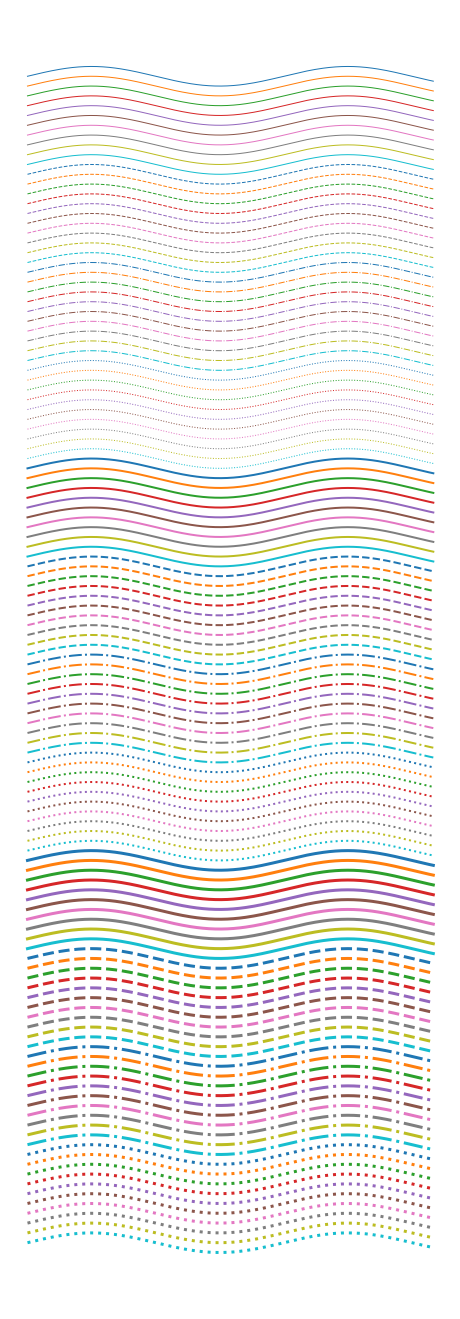

In [23]:
all_120_linespecs = pu.get_linespecs()
pu.linespecs_demo(all_120_linespecs);

You can also specify color scheme, specify line styles, and line widths:

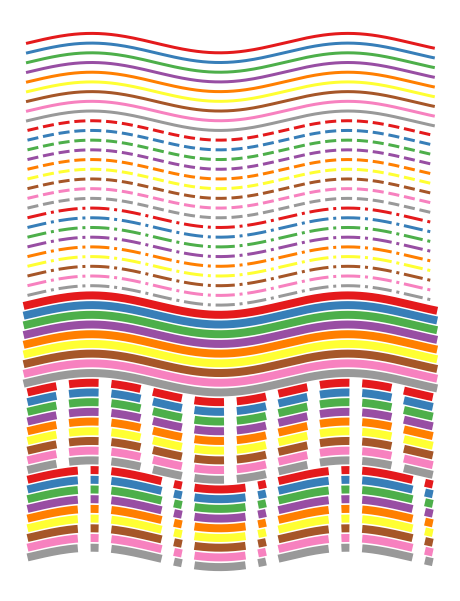

In [24]:
line_specs = pu.get_linespecs(color_scheme='set1',n_linestyle=3,range_linewidth=[3,8])
pu.linespecs_demo(line_specs);

Additionally, you can change the "cycling priority" via the `priority` argument (valid values: `color`, `linestyle`, and `linewidth`).

For example, if you change priority to `linestyle`, then line styles gets changed first before color changes.

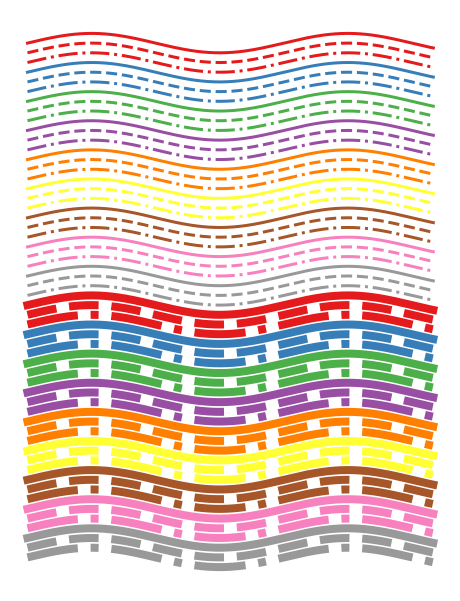

In [25]:
line_specs = pu.get_linespecs(color_scheme='set1',n_linestyle=3,range_linewidth=[3,8],priority='linestyle')
pu.linespecs_demo(line_specs);

For black-and-white plotting, set the `black_and_white` argument to True. It is also recommended to set priority to `linewidth` for better visual distinguishability.

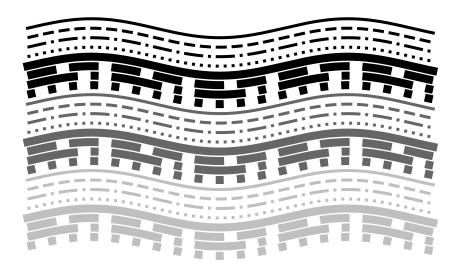

In [26]:
line_specs = pu.get_linespecs(color_scheme='bw',range_linewidth=[3,8],priority='linewidth')
pu.linespecs_demo(line_specs);